In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load csv data
df = pd.read_csv('../data/user_analysis.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## Task 2

In [3]:
# 1. Top 10 handsets used by the customers
handset_counts = df.groupby('Handset Type')['MSISDN/Number'].count()
handset_count_sorted = handset_counts.sort_values(ascending=False)
handset_count_sorted.head(10)

Handset Type
Huawei B528S-23A                28739
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: MSISDN/Number, dtype: int64

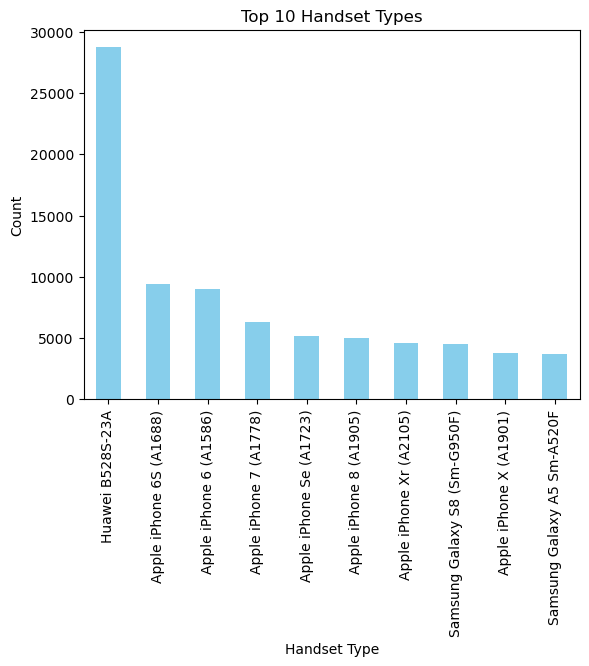

In [4]:
handset_count_sorted.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Handset Types')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.show()

In [5]:
# 2. Top 3 handsets manufacturers
top_3_handset_manufacturers = df["Handset Manufacturer"].value_counts().head(3)
top_3_handset_manufacturers

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

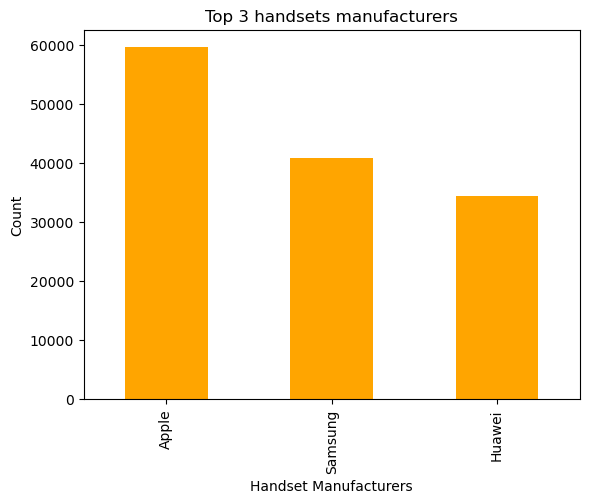

In [6]:
top_3_handset_manufacturers.plot(kind='bar', color='orange')
plt.title('Top 3 handsets manufacturers')
plt.xlabel('Handset Manufacturers')
plt.ylabel('Count')
plt.show()

In [7]:
# 3. op 5 handsets per top 3 handset manufacturer
top3_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index
df_top3 = df[df['Handset Manufacturer'].isin(top3_manufacturers)]
top5_handsets_per_manufacturer = (
    df_top3.groupby(['Handset Manufacturer', 'Handset Type'])
    ['MSISDN/Number']
    .count()
    .reset_index(name='Count')
    .sort_values(['Handset Manufacturer', 'Count'], ascending=[True, False])
    .groupby('Handset Manufacturer')
    .head(5)
)
top5_handsets_per_manufacturer

,Handset Manufacturer,Handset Type,Count
35,Apple,Apple iPhone 6S (A1688),9419
31,Apple,Apple iPhone 6 (A1586),9023
41,Apple,Apple iPhone 7 (A1778),6326
55,Apple,Apple iPhone Se (A1723),5187
48,Apple,Apple iPhone 8 (A1905),4993
83,Huawei,Huawei B528S-23A,19752
104,Huawei,Huawei E5180,2079
183,Huawei,Huawei P20 Lite Huawei Nova 3E,2021
182,Huawei,Huawei P20,1480
224,Huawei,Huawei Y6 2018,997


In [8]:
# Recommendation # todo

In [9]:
# 2.1 number of xDr sessions
xdr_session_per_user = df.groupby(["MSISDN/Number"])["Bearer Id"].count()
xdr_session_per_user

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Name: Bearer Id, Length: 106856, dtype: int64

In [10]:
# session duration
session_duration = df.groupby(["MSISDN/Number"])["Dur. (ms)"].sum()
session_duration

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64

In [11]:
# total download (DL) and upload (UL) data
total_data_per_user = df.groupby('MSISDN/Number').agg({
    'Total DL (Bytes)': 'sum', 
    'Total UL (Bytes)': 'sum'
})
total_data_per_user.columns = ['Total Download (DL)', 'Total Upload (UL)']
total_data_per_user

,Total Download (DL),Total Upload (UL)
MSISDN/Number,,
3.360100e+10,8.426375e+08,36053108.0
3.360100e+10,1.207552e+08,36104459.0
3.360100e+10,5.566597e+08,39306820.0
3.360101e+10,4.019932e+08,20327526.0
3.360101e+10,1.363130e+09,94280527.0
...,...,...
3.379000e+10,6.879252e+08,26716429.0
3.379000e+10,4.445751e+08,35732243.0
3.197021e+12,1.948281e+08,37295915.0


In [15]:
# the total data volume (in Bytes) during this session for each application


total_data_per_user_for_each_application = df.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
    
})
total_data_per_user_for_each_application

,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,
3.360100e+10,2206504.0,25631.0,14900201.0,6724347.0,10265105.0,16915876.0,3337123.0,1051882.0,837400.0,493962.0,8.110911e+08,1367528.0,377096990.0,9473882.0
3.360100e+10,2598548.0,62017.0,5324251.0,7107972.0,770569.0,10451194.0,4197697.0,1137166.0,2828821.0,478960.0,1.050353e+08,14714780.0,279557701.0,2152370.0
3.360100e+10,3148004.0,47619.0,2137272.0,19196298.0,16525919.0,2827981.0,3343483.0,99643.0,2436500.0,768880.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3.360101e+10,251469.0,28825.0,4393123.0,2584198.0,1157362.0,784730.0,5937765.0,3740728.0,2178618.0,106052.0,3.880748e+08,3051292.0,25248001.0,10031701.0
3.360101e+10,2861230.0,51312.0,10339971.0,31193031.0,24971647.0,24230077.0,13728668.0,4770948.0,2247808.0,1057661.0,1.308981e+09,5816727.0,777643713.0,27160771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,234320.0,65863.0,8294310.0,18353533.0,14754741.0,147797.0,6834178.0,697091.0,480946.0,525969.0,6.573267e+08,3034642.0,291391283.0,3891534.0
3.379000e+10,442214.0,56355.0,5596862.0,14254710.0,6929961.0,1601099.0,1472406.0,3957299.0,2513433.0,664.0,4.276202e+08,9383076.0,204636073.0,6479040.0
3.197021e+12,668596.0,46628.0,9839889.0,2120016.0,10340908.0,16251392.0,8572779.0,1865881.0,842279.0,678492.0,1.645636e+08,13485133.0,467678100.0,2848373.0


In [ ]:
# to do find the applicaton the max data was used for each user

In [19]:
# Task 2.2 Conducting EDA
# Mean, Median of numerical columns
numeric_columns = df.select_dtypes(include=['float', 'int'])
mean_values = numeric_columns.mean()
median_values = numeric_columns.median()
summary_stats = pd.DataFrame({'Mean': mean_values, 'Median': median_values})
summary_stats

,Mean,Median
Bearer Id,1.013887e+19,7.349883e+18
Start ms,4.991882e+02,4.990000e+02
End ms,4.988009e+02,5.000000e+02
Dur. (ms),1.046084e+05,8.639900e+04
IMSI,2.082016e+14,2.082015e+14
MSISDN/Number,4.182441e+10,3.366371e+10
IMEI,4.842592e+13,3.572201e+13
Avg RTT DL (ms),9.777445e+01,4.500000e+01
Avg RTT UL (ms),1.531503e+01,5.000000e+00
Avg Bearer TP DL (kbps),1.329996e+04,6.300000e+01


In [23]:
# mode of catagorical columns
catagorical_columns = df.select_dtypes(include=['object'])
mode_values = catagorical_columns.mode().iloc[0]
mode_values
# To do data is considered as an object it should be changed to date type

Start                     4/26/2019 7:25
End                       4/25/2019 0:01
Last Location Name               D41377B
Handset Manufacturer               Apple
Handset Type            Huawei B528S-23A
Name: 0, dtype: object

##### Interpretation using mean, median, and mode
- Mean: provides average value, we can use it to extract information lke the mean session duration to get an  overview of user behavior
- Medain: robust measure of central tendancy:  useful for understanding the central position of the majority of users
- Mode: most repeated value, can help identify the most common satisfaction level

In [29]:
# non-graphical univariate analysis using computing dispersion parameters
dispersion_data = pd.DataFrame(index=numeric_columns.columns)
dispersion_data["Range"] = numeric_columns.max() - numeric_columns.min()
dispersion_data["IQR"] = numeric_columns.quantile(0.75) - numeric_columns.quantile(0.25)
dispersion_data['Variance'] = numeric_columns.var()
dispersion_data['Std_Deviation'] = numeric_columns.std()
dispersion_data['Skewness'] = numeric_columns.skew()
dispersion_data

,Range,IQR,Variance,Std_Deviation,CV,Skewness
Bearer Id,6.269004e+18,5.692543e+18,8.315146e+36,2.883600e+18,28.441022,0.026755
Start ms,9.990000e+02,4.990000e+02,8.329624e+04,2.886109e+02,57.816045,0.000968
End ms,9.990000e+02,4.990000e+02,8.299970e+04,2.880967e+02,57.757856,-0.001163
Dur. (ms),1.852194e+06,7.498800e+04,6.567055e+09,8.103736e+04,77.467330,3.952624
IMSI,1.002719e+13,3.703424e+08,4.599835e+20,2.144723e+10,0.010301,41.124210
MSISDN/Number,8.823635e+14,3.156358e+07,5.947411e+24,2.438731e+12,5830.880581,333.342445
IMEI,9.856119e+13,5.065709e+13,5.011953e+26,2.238739e+13,46.230187,1.077346
Avg RTT DL (ms),9.692300e+04,2.700000e+01,3.134986e+05,5.599094e+02,572.654120,69.557811
Avg RTT UL (ms),7.120000e+03,8.000000e+00,5.881049e+03,7.668800e+01,500.736802,31.426589
Avg Bearer TP DL (kbps),3.781600e+05,1.966700e+04,5.746483e+08,2.397182e+04,180.239844,2.589447


##### Interpretation using measures of dispersion
- IQR: Indicate the variability or dispersion of user-related metrics, giving insights into how consistent or diverse user behaviors are

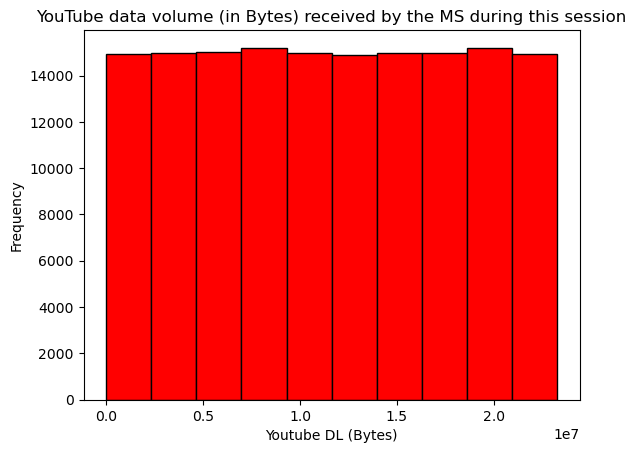

In [36]:
# graphical univariate analysis
plt.hist(df['Youtube DL (Bytes)'], color="red", edgecolor="black")
plt.title("YouTube data volume (in Bytes) received by the MS during this session")
plt.xlabel("Youtube DL (Bytes)")
plt.ylabel("Frequency")
plt.show()

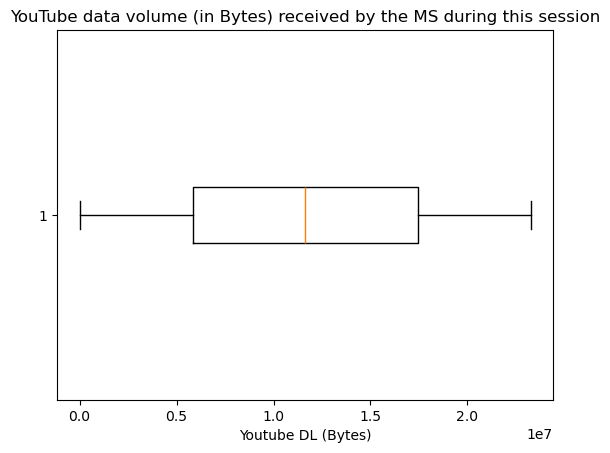

In [37]:
plt.boxplot(df['Youtube DL (Bytes)'], vert=False)
plt.title('YouTube data volume (in Bytes) received by the MS during this session')
plt.xlabel('Youtube DL (Bytes)')
plt.show()

##### Interpretation of the graph
- First Graph: shows that Youtube DL (Bytes) is consistant and uniformly distributed
- Second Graph: shows the IQR, max and minimum, and median of Youtube DL (Bytes)

/home/ablaze/miniconda3/envs/week_1/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ablaze/miniconda3/envs/week_1/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ablaze/miniconda3/envs/week_1/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ablaze/miniconda3/envs/week_1/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

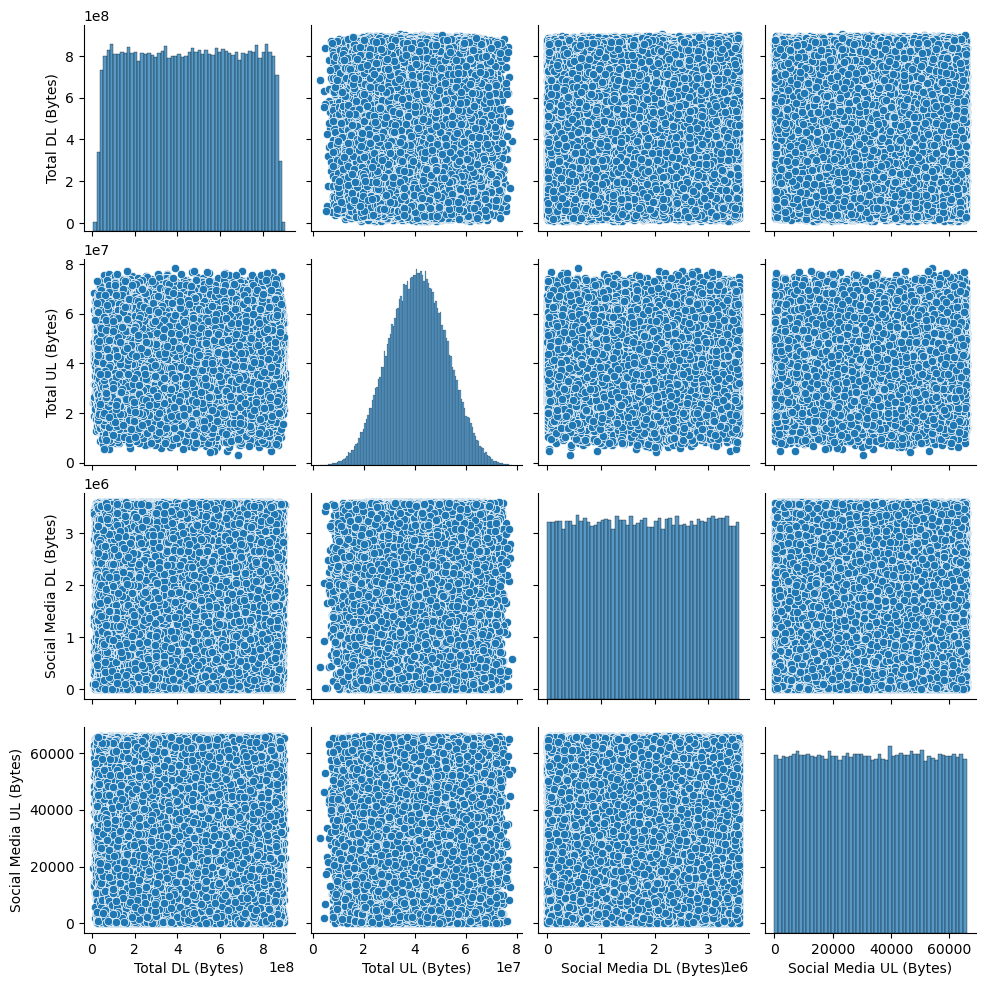

In [41]:
# bivariate Analysis between Social media and the ttotal dl+il data 
# Select relevant columns
selected_columns = ['Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)']
# Create a subset of the DataFrame
subset_df = df[selected_columns]

# Plot a scatter plot matrix
sns.pairplot(subset_df)
plt.show()

#to do convert inf values to nan

In [45]:
correlation_matrix = subset_df.corr()
correlation_matrix

,Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes)
Total DL (Bytes),1.000000,-0.001895,0.005164,0.000206
Total UL (Bytes),-0.001895,1.000000,0.004798,-0.000204
Social Media DL (Bytes),0.005164,0.004798,1.000000,-0.000555
Social Media UL (Bytes),0.000206,-0.000204,-0.000555,1.000000


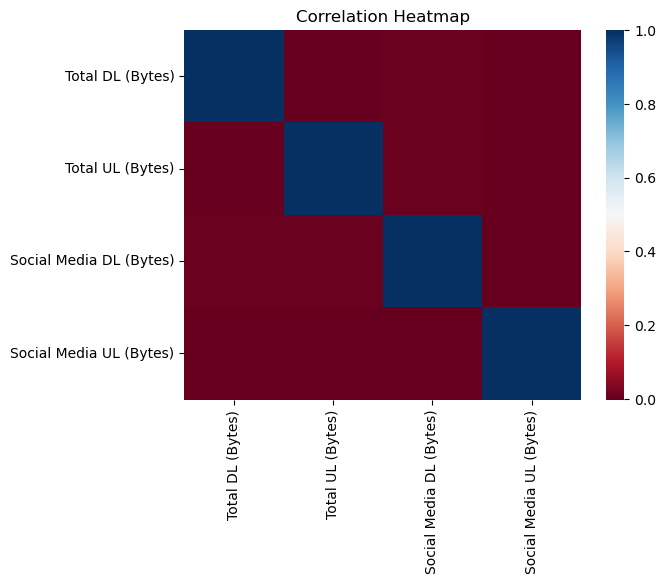

In [49]:
# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, cmap="RdBu")
plt.title('Correlation Heatmap')
plt.show()